<a href="https://colab.research.google.com/github/azaelabarca/visualizacionazael/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis de covid en diferentes paises

Azael Eugenio Abarca López
A00831474

In [21]:
path = 'https://raw.githubusercontent.com/azaelabarca/visualizacionazael/main/datasets/covid_worldwide.csv' 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)
df.head()

# Descpricpción de la base de datos 

Esta base nos muestra varios datos importantes del covid en varios paises alrededor del mundo


In [23]:
df.drop('Serial Number', axis=1, inplace=True)

In [24]:
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


# Descripcion de las variales

* Country: Pais, variable categorica
* Total Cases: Total casos, variable numerica 
* Total Deaths: Total de muertes, variable numerica
* Total Recovered: Total de personas recuperadas, variable numerica
* Active Cases: Casos activos, variable numerica
* Total Test: Total de pruebas, variable numerica
* Population: Población del país, variable numerica

In [25]:
df['Total Cases']=df['Total Cases'].str.replace(',', '', regex=True).astype("float")
df['Total Deaths']=df['Total Deaths'].str.replace(',', '', regex=True).astype("float")
df['Total Recovered']=df['Total Recovered'].str.replace(',', '', regex=True).astype("float")
df['Active Cases']=df['Active Cases'].str.replace(',', '', regex=True).astype("float")
df['Total Test']=df['Total Test'].str.replace(',', '', regex=True).astype("float")
df['Population']=df['Population'].str.replace(',', '', regex=True).astype("float")

##Pivot

In [51]:
my_pivot = pd.pivot_table(df,
                          index = ['Country'], 
                          values = ['Total Recovered','Active Cases'], 
                          aggfunc = ['mean', 'sum', 'median']
)
my_pivot.head()

mean                          sum                  \
            Active Cases Total Recovered Active Cases Total Recovered   
Country                                                                 
Afghanistan      14575.0        186088.0      14575.0        186088.0   
Albania           1621.0        328951.0       1621.0        328951.0   
Algeria          81748.0        182749.0      81748.0        182749.0   
Andorra            111.0         47563.0        111.0         47563.0   
Angola              37.0        103216.0         37.0        103216.0   

                  median                  
            Active Cases Total Recovered  
Country                                   
Afghanistan      14575.0        186088.0  
Albania           1621.0        328951.0  
Algeria          81748.0        182749.0  
Andorra            111.0         47563.0  
Angola              37.0        103216.0

## Gráfica de barras con los paises con mayor porcentaje de muertes

In [ ]:
df['percentage of patients death'] = df['Total Deaths']/df['Total Cases']*100
df[['Country','percentage of patients death']].head()

In [ ]:
percentage_of_death = df[['Country', 'percentage of patients death']].sort_values(by = 'percentage of patients death', ascending=False)
percentage_of_death[:10]

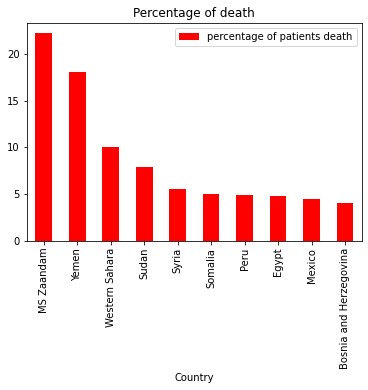

In [29]:
percentage_of_death[:10].plot(kind='bar', 
                        x='Country', 
                        y='percentage of patients death', 
                        color='red', 
                        title='Percentage of death');

## Conclusion

En esta gráfica podemos ver los 10 paises con porcentaje mas alto de muertes.

## Saca el número de gente recuperada por caso

In [ ]:
df['recovered by cases'] = df['Total Cases']-df['Total Recovered']
best_recovery = df[['Country','recovered by cases']].sort_values(by='recovered by cases',ascending=False)
best_recovery[:10]

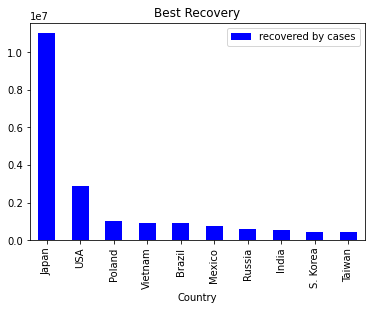

In [31]:
best_recovery[:10].plot(kind='bar', 
                        x='Country', 
                        y='recovered by cases', 
                        color='Blue', 
                        title='Best Recovery');

##Realiza una grafica que puedas comparar la cantidad de casos contra la población de cada pais.

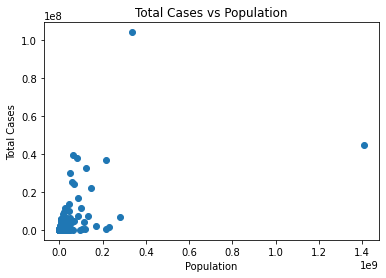

In [32]:
plt.scatter(df['Population'], df['Total Cases'])

plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.title('Total Cases vs Population')

plt.show()

En esta gráfica podemos ver como en dos casos hay discrepancia, en uno que tiene pocos casos en relación con su población y en el otro muchisimos casos en comparación de la población.

##Realiza un histograma de la distribucion de casos por pais

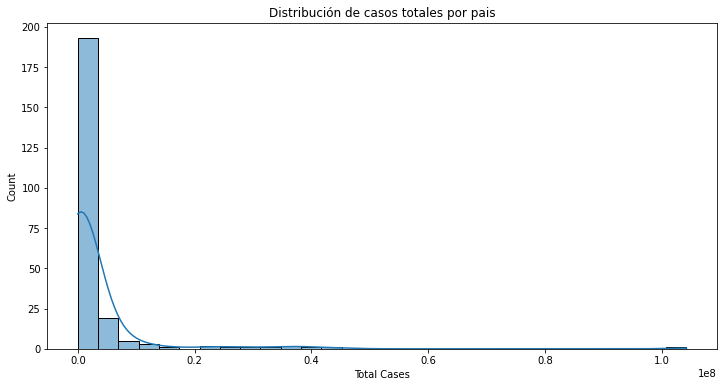

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Total Cases", bins=30, kde=True)
plt.title("Distribución de casos totales por pais")
plt.xlabel("Total Cases")
plt.ylabel("Count")
plt.show()

en este grafico podemos ver la distribución del total de casos por paises

##Realiza un boxplot de el total de casos por paises

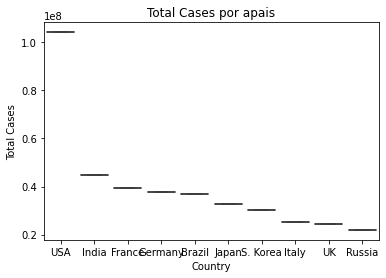

In [58]:
sns.boxplot(x='Country', y='Total Cases', data=df.head(10))

plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Total Cases por apais')

plt.show()

En este grafico de boxplot podemos llegar a observar los diferentes totales de casos de los 10 principales paises

##Realiza un pie chart de los 10 paises con el mayor número de casos activos

In [ ]:
most_active_cases=df[['Country','Active Cases']].sort_values(by='Active Cases',ascending=False).head(10)
most_active_cases

([<matplotlib.patches.Wedge at 0x7f05f6654c70>,
 [Text(-0.5186822753307824, 0.9700354103112332, 'Japan'),
  Text(-0.2838286698412306, -1.0627517519045349, 'USA'),
  Text(0.2625675341871994, -1.0682032999344526, 'Poland'),
  Text(0.6020843623538015, -0.9205946016618913, 'Vietnam'),
  Text(0.8072313547736724, -0.7472466392498942, 'Mexico'),
  Text(0.9163114870065274, -0.6085829925161291, 'Taiwan'),
  Text(1.0012451010508314, -0.45553073180819603, 'S. Korea'),
  Text(1.056954561107805, -0.30470814848541156, 'Hong Kong'),
  Text(1.086912535460025, -0.16917783619570292, 'Costa Rica'),
  Text(1.0987627793214525, -0.052157020407585034, 'Italy')],
 [Text(-0.2829176047258813, 0.5291102238061272, '65.63%'),
  Text(-0.1548156380952167, -0.5796827737661098, '10.43%'),
  Text(0.14321865501119968, -0.5826563454187922, '5.55%'),
  Text(0.3284096521929826, -0.5021425099973952, '5.22%'),
  Text(0.4403080116947304, -0.4075890759544877, '2.57%'),
  Text(0.499806265639924, -0.3319543595542522, '2.54%'),
 

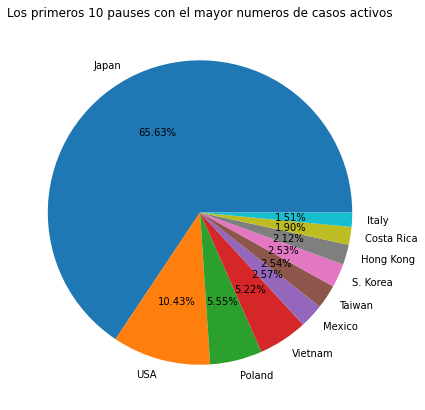

In [59]:
plt.figure(figsize=(7,7))
plt.title("Los primeros 10 pauses con el mayor numeros de casos activos")
plt.pie(most_active_cases['Active Cases'],
        labels=most_active_cases['Country'],
        autopct='%0.2f%%')

En esta gráfica podemos ver de como japon tiene una enorme diferencia de casos activos a comparación al resto de los otros paises.